In [287]:
#Exploratory Data Analysis
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [288]:
#read the dataset
churn_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [270]:
churn_data.shape

(7043, 21)

In [289]:
#look for missing values
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
#no missing values

In [290]:
#checking value count of target variables
churn_data['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

In [253]:
# binary valued columns
columns = churn_data.columns
binary_cols = []
for col in columns:
    if churn_data[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [254]:
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [222]:
# multiple valued columns
columns = churn_data.columns
multiple_cols = []
for col in columns:
    if churn_data[col].value_counts().shape[0] > 2:
        multiple_cols.append(col)
multiple_cols

['customerID',
 'tenure',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

C:\Users\Bharathi Kondaveeti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bharathi Kondaveeti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bharathi Kondaveeti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

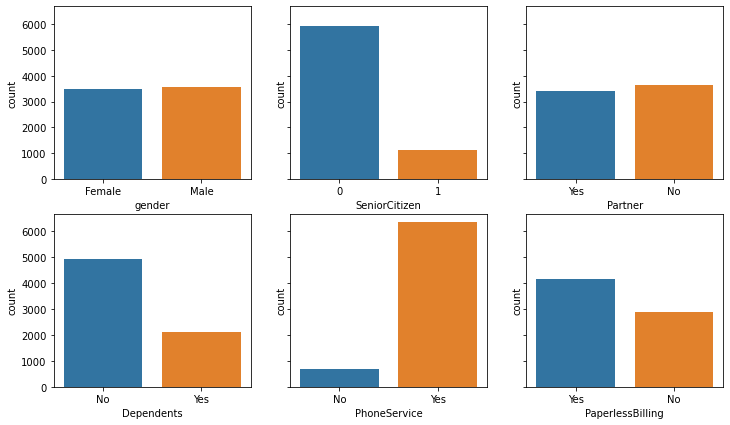

In [291]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=churn_data, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=churn_data, ax=axes[0,1])
sns.countplot("Partner", data=churn_data, ax=axes[0,2])
sns.countplot("Dependents", data=churn_data, ax=axes[1,0])
sns.countplot("PhoneService", data=churn_data, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=churn_data, ax=axes[1,2])

In [292]:
#replacing yes = 1 and no = 0 for churn column
churn_data.Churn.replace({"Yes":1, "No":0}, inplace = True)

In [293]:
churn_data['Churn'].value_counts()


0    5174
1    1869
Name: Churn, dtype: int64

In [226]:
#relation between binary cols and target variables 
churn_data[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


In [179]:
churn_data[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [99]:
churn_data[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [100]:
churn_data[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [101]:
churn_data[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [102]:
churn_data[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


C:\Users\Bharathi Kondaveeti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


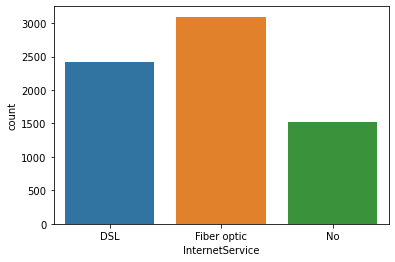

In [103]:
#relation between multiple cols and target variables 
sns.countplot("InternetService", data=churn_data)
churn_data[['InternetService','Churn']].groupby(['InternetService']).mean()

C:\Users\Bharathi Kondaveeti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bharathi Kondaveeti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bharathi Kondaveeti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

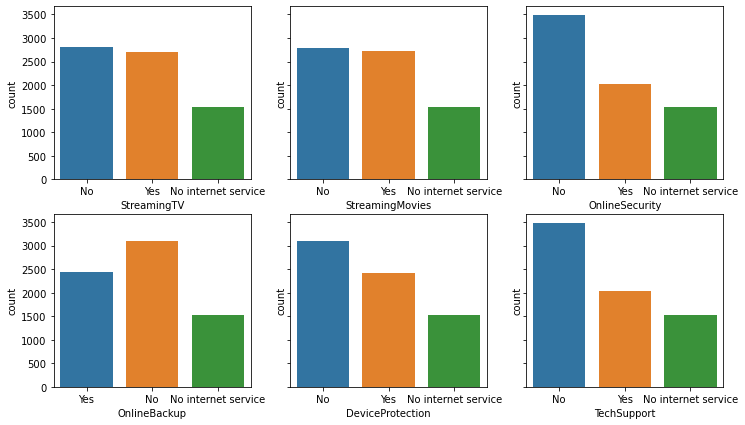

In [294]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("StreamingTV", data=churn_data, ax=axes[0,0])
sns.countplot("StreamingMovies", data=churn_data, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=churn_data, ax=axes[0,2])
sns.countplot("OnlineBackup", data=churn_data, ax=axes[1,0])
sns.countplot("DeviceProtection", data=churn_data, ax=axes[1,1])
sns.countplot("TechSupport", data=churn_data, ax=axes[1,2])

In [81]:
churn_data[['StreamingTV','Churn']].groupby(['StreamingTV']).mean()


,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [82]:
churn_data[['StreamingMovies','Churn']].groupby(['StreamingMovies']).mean()


,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [83]:
churn_data[['OnlineSecurity','Churn']].groupby(['OnlineSecurity']).mean()


,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [39]:
churn_data[['OnlineBackup','Churn']].groupby(['OnlineBackup']).mean()


,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [40]:
churn_data[['DeviceProtection','Churn']].groupby(['DeviceProtection']).mean()


,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [41]:
churn_data[['TechSupport','Churn']].groupby(['TechSupport']).mean()


,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


In [228]:
churn_data.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [229]:
churn_data.MultipleLines.value_counts()


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [57]:
churn_data[['MultipleLines','Churn']].groupby(['MultipleLines']).mean()


,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


C:\Users\Bharathi Kondaveeti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contract', ylabel='count'>

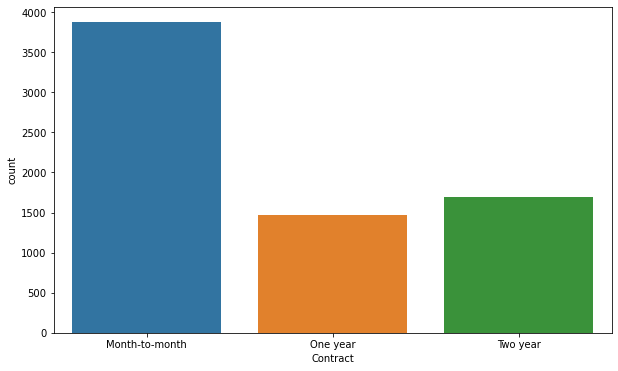

In [295]:
plt.figure(figsize=(10,6))
sns.countplot("Contract", data=churn_data)

In [184]:
churn_data[['Contract','Churn']].groupby(['Contract']).mean()


,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


C:\Users\Bharathi Kondaveeti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


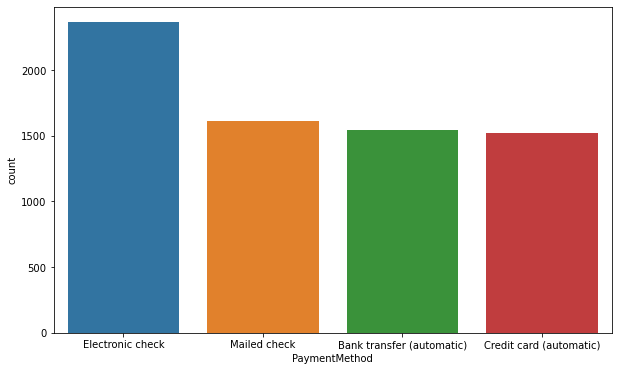

In [108]:
plt.figure(figsize=(10,6))
sns.countplot("PaymentMethod", data=churn_data)
churn_data[['PaymentMethod','Churn']].groupby(['PaymentMethod']).mean()


C:\Users\Bharathi Kondaveeti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bharathi Kondaveeti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

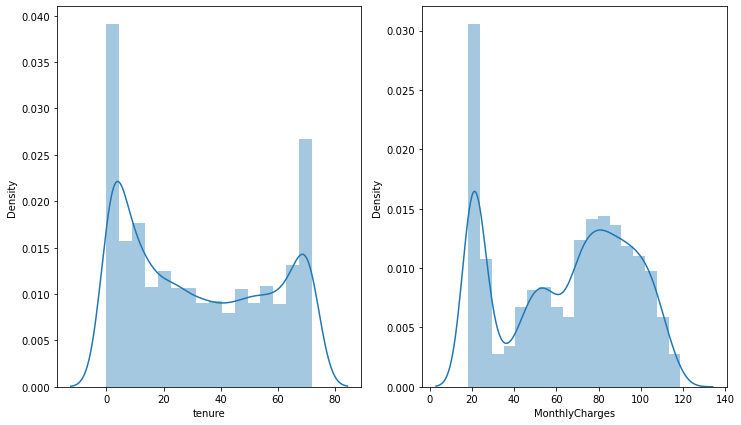

In [135]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(churn_data["tenure"], ax=axes[0])
sns.distplot(churn_data["MonthlyCharges"], ax=axes[1])

In [136]:
churn_data[['tenure','MonthlyCharges','Churn']].groupby(['Churn']).mean()


,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


In [137]:
churn_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [296]:
#dropping unwanted columns
churn_data.drop(["customerID","gender","PhoneService","Contract","TotalCharges"], axis=1, inplace=True)

In [297]:
churn_data.head(10)


,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1
5,0,No,No,8,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,Electronic check,99.65,1
6,0,No,Yes,22,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes,Credit card (automatic),89.10,0
7,0,No,No,10,No phone service,DSL,Yes,No,No,No,No,No,No,Mailed check,29.75,0
8,0,Yes,No,28,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,Electronic check,104.80,1
9,0,No,Yes,62,No,DSL,Yes,Yes,No,No,No,No,No,Bank transfer (automatic),56.15,0


In [140]:
churn_data.shape

(7043, 16)

In [298]:
#Data Pre-Processing
from sklearn.preprocessing import MinMaxScaler
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(churn_data, columns=cat_features, drop_first=True)

In [282]:

X.head()


,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,53.85,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,70.70,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [299]:
sc = MinMaxScaler()
a = sc.fit_transform(churn_data[['tenure']])
b = sc.fit_transform(churn_data[['MonthlyCharges']])
X['tenure'] = a
X['MonthlyCharges'] = b

In [300]:
X.shape
(7043, 26)

(7043, 26)

In [301]:
X.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.027778,0.354229,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.027778,0.521891,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


C:\Users\Bharathi Kondaveeti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution Before Resampling')

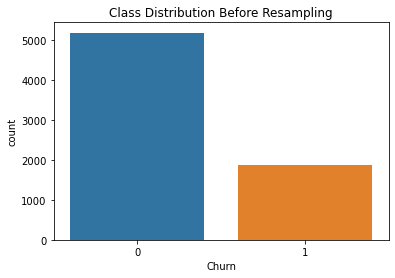

In [302]:
sns.countplot('Churn', data=churn_data).set_title('Class Distribution Before Resampling')

In [303]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

5174


C:\Users\Bharathi Kondaveeti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution After Resampling')

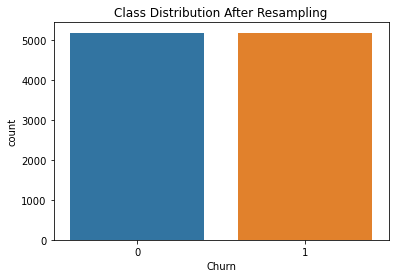

In [304]:

X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

In [305]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Decision Tree with giniIndex Results
Predicted values: [1 0 1 ... 0 0 0]
Confusion Matrix:  [[713 331]
 [191 835]]
Accuracy :  74.78260869565217
Report :                precision    recall  f1-score   support

           0       0.79      0.68      0.73      1044
           1       0.72      0.81      0.76      1026

    accuracy                           0.75      2070
   macro avg       0.75      0.75      0.75      2070
weighted avg       0.75      0.75      0.75      2070



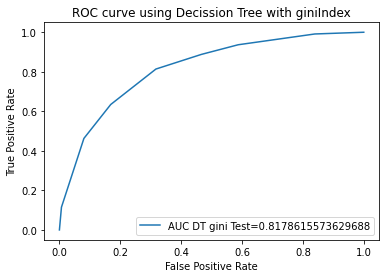


Decision Tree with entropy Results
Predicted values: [1 0 1 ... 0 0 0]
Confusion Matrix:  [[713 331]
 [191 835]]
Accuracy :  74.78260869565217
Report :                precision    recall  f1-score   support

           0       0.79      0.68      0.73      1044
           1       0.72      0.81      0.76      1026

    accuracy                           0.75      2070
   macro avg       0.75      0.75      0.75      2070
weighted avg       0.75      0.75      0.75      2070



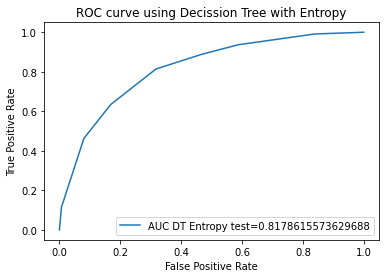

In [307]:
#Decission Tree classification
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

# Decision tree with giniIndex
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
# Performing training
clf_gini.fit(X_train, y_train)
# Predicton with giniIndex
y_pred = clf_gini.predict(X_test)
print("Decision Tree with giniIndex Results")
print("Predicted values:",y_pred)
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)
print("Report : ",classification_report(y_test, y_pred))

#AUC & ROC CURVE 
y_pred_proba = clf_gini.predict_proba(X_test)[::,1]
fpr_DTGTEST, tpr_DTGTEST, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_DTGTEST = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr_DTGTEST,tpr_DTGTEST,label="AUC DT gini Test="+str(auc_DTGTEST))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("ROC curve using Decission Tree with giniIndex")
plt.show()

# Decision tree with entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)
# Performing training
clf_entropy.fit(X_train, y_train)
y_pred = clf_entropy.predict(X_test)
print("")
print("Decision Tree with entropy Results")
print("Predicted values:",y_pred)
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)
print("Report : ",classification_report(y_test, y_pred))

#AUC & ROC CURVE 
y_pred_proba = clf_entropy.predict_proba(X_test)[::,1]
fpr_DTETEST, tpr_DTETEST, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_DTETEST = metrics.roc_auc_score(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr_DTETEST,tpr_DTETEST,label="AUC DT Entropy test="+str(auc_DTETEST))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("ROC curve using Decission Tree with Entropy")
plt.show()



In [308]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Logistic Regression Results")
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report
print("Report : ",classification_report(y_test, y_pred))


Logistic Regression Results
Confusion Matrix : 
 [[783 261]
 [235 791]]
Accuracy :  76.03864734299518
Report :                precision    recall  f1-score   support

           0       0.77      0.75      0.76      1044
           1       0.75      0.77      0.76      1026

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070



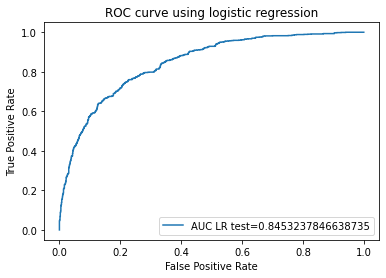

In [309]:
#define metrics Logistic regression
from sklearn import metrics

y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr_lt, tpr_lt, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_lt = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr_lt,tpr_lt,label="AUC LR test="+str(auc_lt))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("ROC curve using logistic regression")
plt.show()

Random Forest Classifier Results
Confusion Matrix : 
 [[818 226]
 [ 96 930]]
ACCURACY OF THE MODEL:  84.44444444444444
Report :                precision    recall  f1-score   support

           0       0.89      0.78      0.84      1044
           1       0.80      0.91      0.85      1026

    accuracy                           0.84      2070
   macro avg       0.85      0.84      0.84      2070
weighted avg       0.85      0.84      0.84      2070



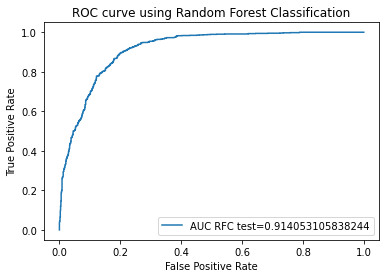

In [310]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)
pred = clf_forest.predict(X_test)
cm = confusion_matrix(y_test, pred)
print("Random Forest Classifier Results")
print ("Confusion Matrix : \n", cm)
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, pred)*100)
print("Report : ",classification_report(y_test, pred))

#define metrics
from sklearn import metrics
y_pred_proba_random = clf_forest.predict_proba(X_test)[::,1]
fpr_r, tpr_r, _ = metrics.roc_curve(y_test,  y_pred_proba_random)
auc_random_test = metrics.roc_auc_score(y_test, y_pred_proba_random)

#create ROC curve
plt.plot(fpr_r,tpr_r,label="AUC RFC test="+str(auc_random_test))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("ROC curve using Random Forest Classification")
plt.show()

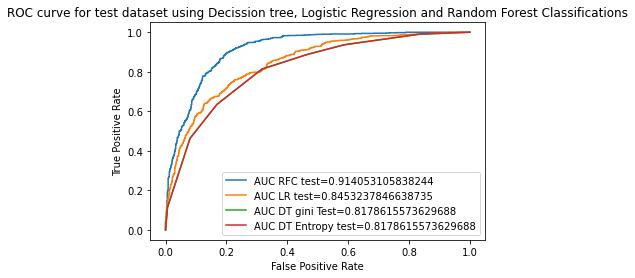

In [311]:
#create ROC curve
plt.plot(fpr_r,tpr_r,label="AUC RFC test="+str(auc_random_test))
plt.plot(fpr_lt,tpr_lt,label="AUC LR test="+str(auc_lt))
plt.plot(fpr_DTGTEST,tpr_DTGTEST,label="AUC DT gini Test="+str(auc_DTGTEST))
plt.plot(fpr_DTETEST,tpr_DTETEST,label="AUC DT Entropy test="+str(auc_DTETEST))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("ROC curve for test dataset using Decission tree, Logistic Regression and Random Forest Classifications")
plt.show()